Load Libraries

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np
from scipy import stats
from imblearn.over_sampling import SMOTE

Load Configuration

In [16]:
config = utils.load_config()

Load Train Set with SMOTE

In [17]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])


In [18]:
train_set = pd.concat([x_train, y_train], axis = 1)

In [19]:
x_ros, y_ros = SMOTE(random_state = 42).fit_resample(
    train_set.drop(columns = config["label"]),
    train_set[config["label"]]
)
train_set_bal = pd.concat([x_ros, y_ros], axis = 1)

Quick Look & Statistical Summary

In [20]:
train_set.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2214,7.822492,208.636720,22308.821729,5.850328,408.123255,502.789396,16.135732,60.393982,3.835332,0.0
1634,6.037428,227.033994,12988.791229,8.476905,392.380529,306.386283,7.122391,41.190507,3.594217,1.0
2605,8.445219,228.522860,28966.569327,6.179855,329.320948,361.705354,14.554220,60.612230,4.400706,0.0
114,6.745307,218.424637,21871.838700,7.165509,322.363422,373.050102,16.826619,74.086080,3.902353,0.0
129,6.506488,202.285938,17087.076902,6.201983,326.662368,481.771934,16.535186,46.205748,3.548776,0.0


In [21]:
round(train_set.describe(),2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2620.00,2620.00,2620.00,2620.00,2620.00,2620.00,2620.00,2620.00,2620.00,2620.00
mean,7.09,196.52,21888.07,7.12,333.85,427.92,14.27,66.18,3.97,0.39
std,1.48,32.64,8760.11,1.60,36.99,80.94,3.30,15.83,0.78,0.49
min,0.23,47.43,320.94,0.35,129.00,181.48,2.20,0.74,1.49,0.00
25%,6.25,177.23,15508.91,6.12,313.73,367.44,12.05,56.27,3.44,0.00
50%,7.04,196.93,20866.34,7.12,333.56,424.94,14.21,66.61,3.97,0.00
75%,7.92,216.43,27152.47,8.11,352.88,484.11,16.54,76.37,4.50,1.00
max,13.54,323.12,61227.20,13.04,481.03,753.34,27.01,124.00,6.74,1.00


Label Distribution Before Balancing

[Text(0, 0, '1598'), Text(0, 0, '1022')]

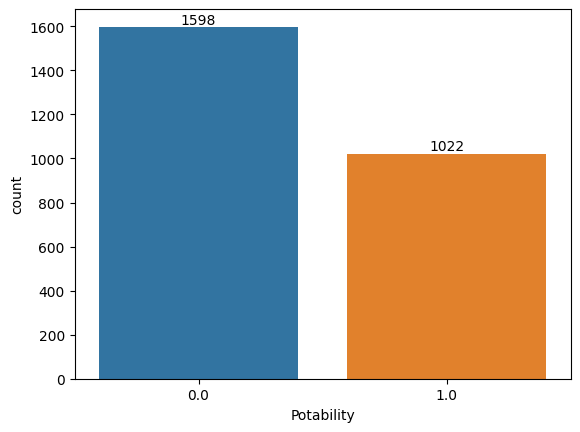

In [22]:
ax = sns.countplot(data = train_set, x = "Potability", label = train_set["Potability"].unique())
ax.bar_label(ax.containers[0])

Label Distribution After Balancing

[Text(0, 0, '1598'), Text(0, 0, '1598')]

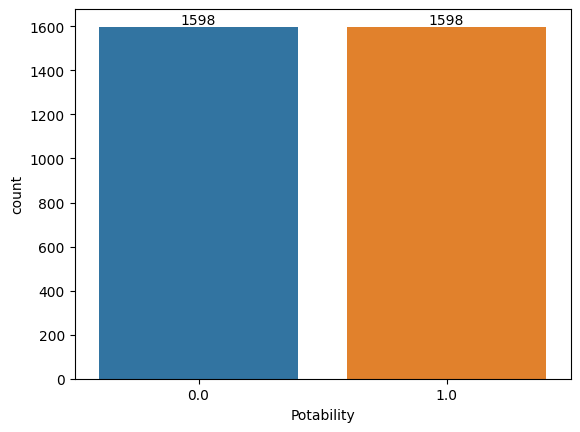

In [23]:
ax = sns.countplot(data = train_set_bal, x = "Potability", label = train_set["Potability"].unique())
ax.bar_label(ax.containers[0])

Graph Distribution

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

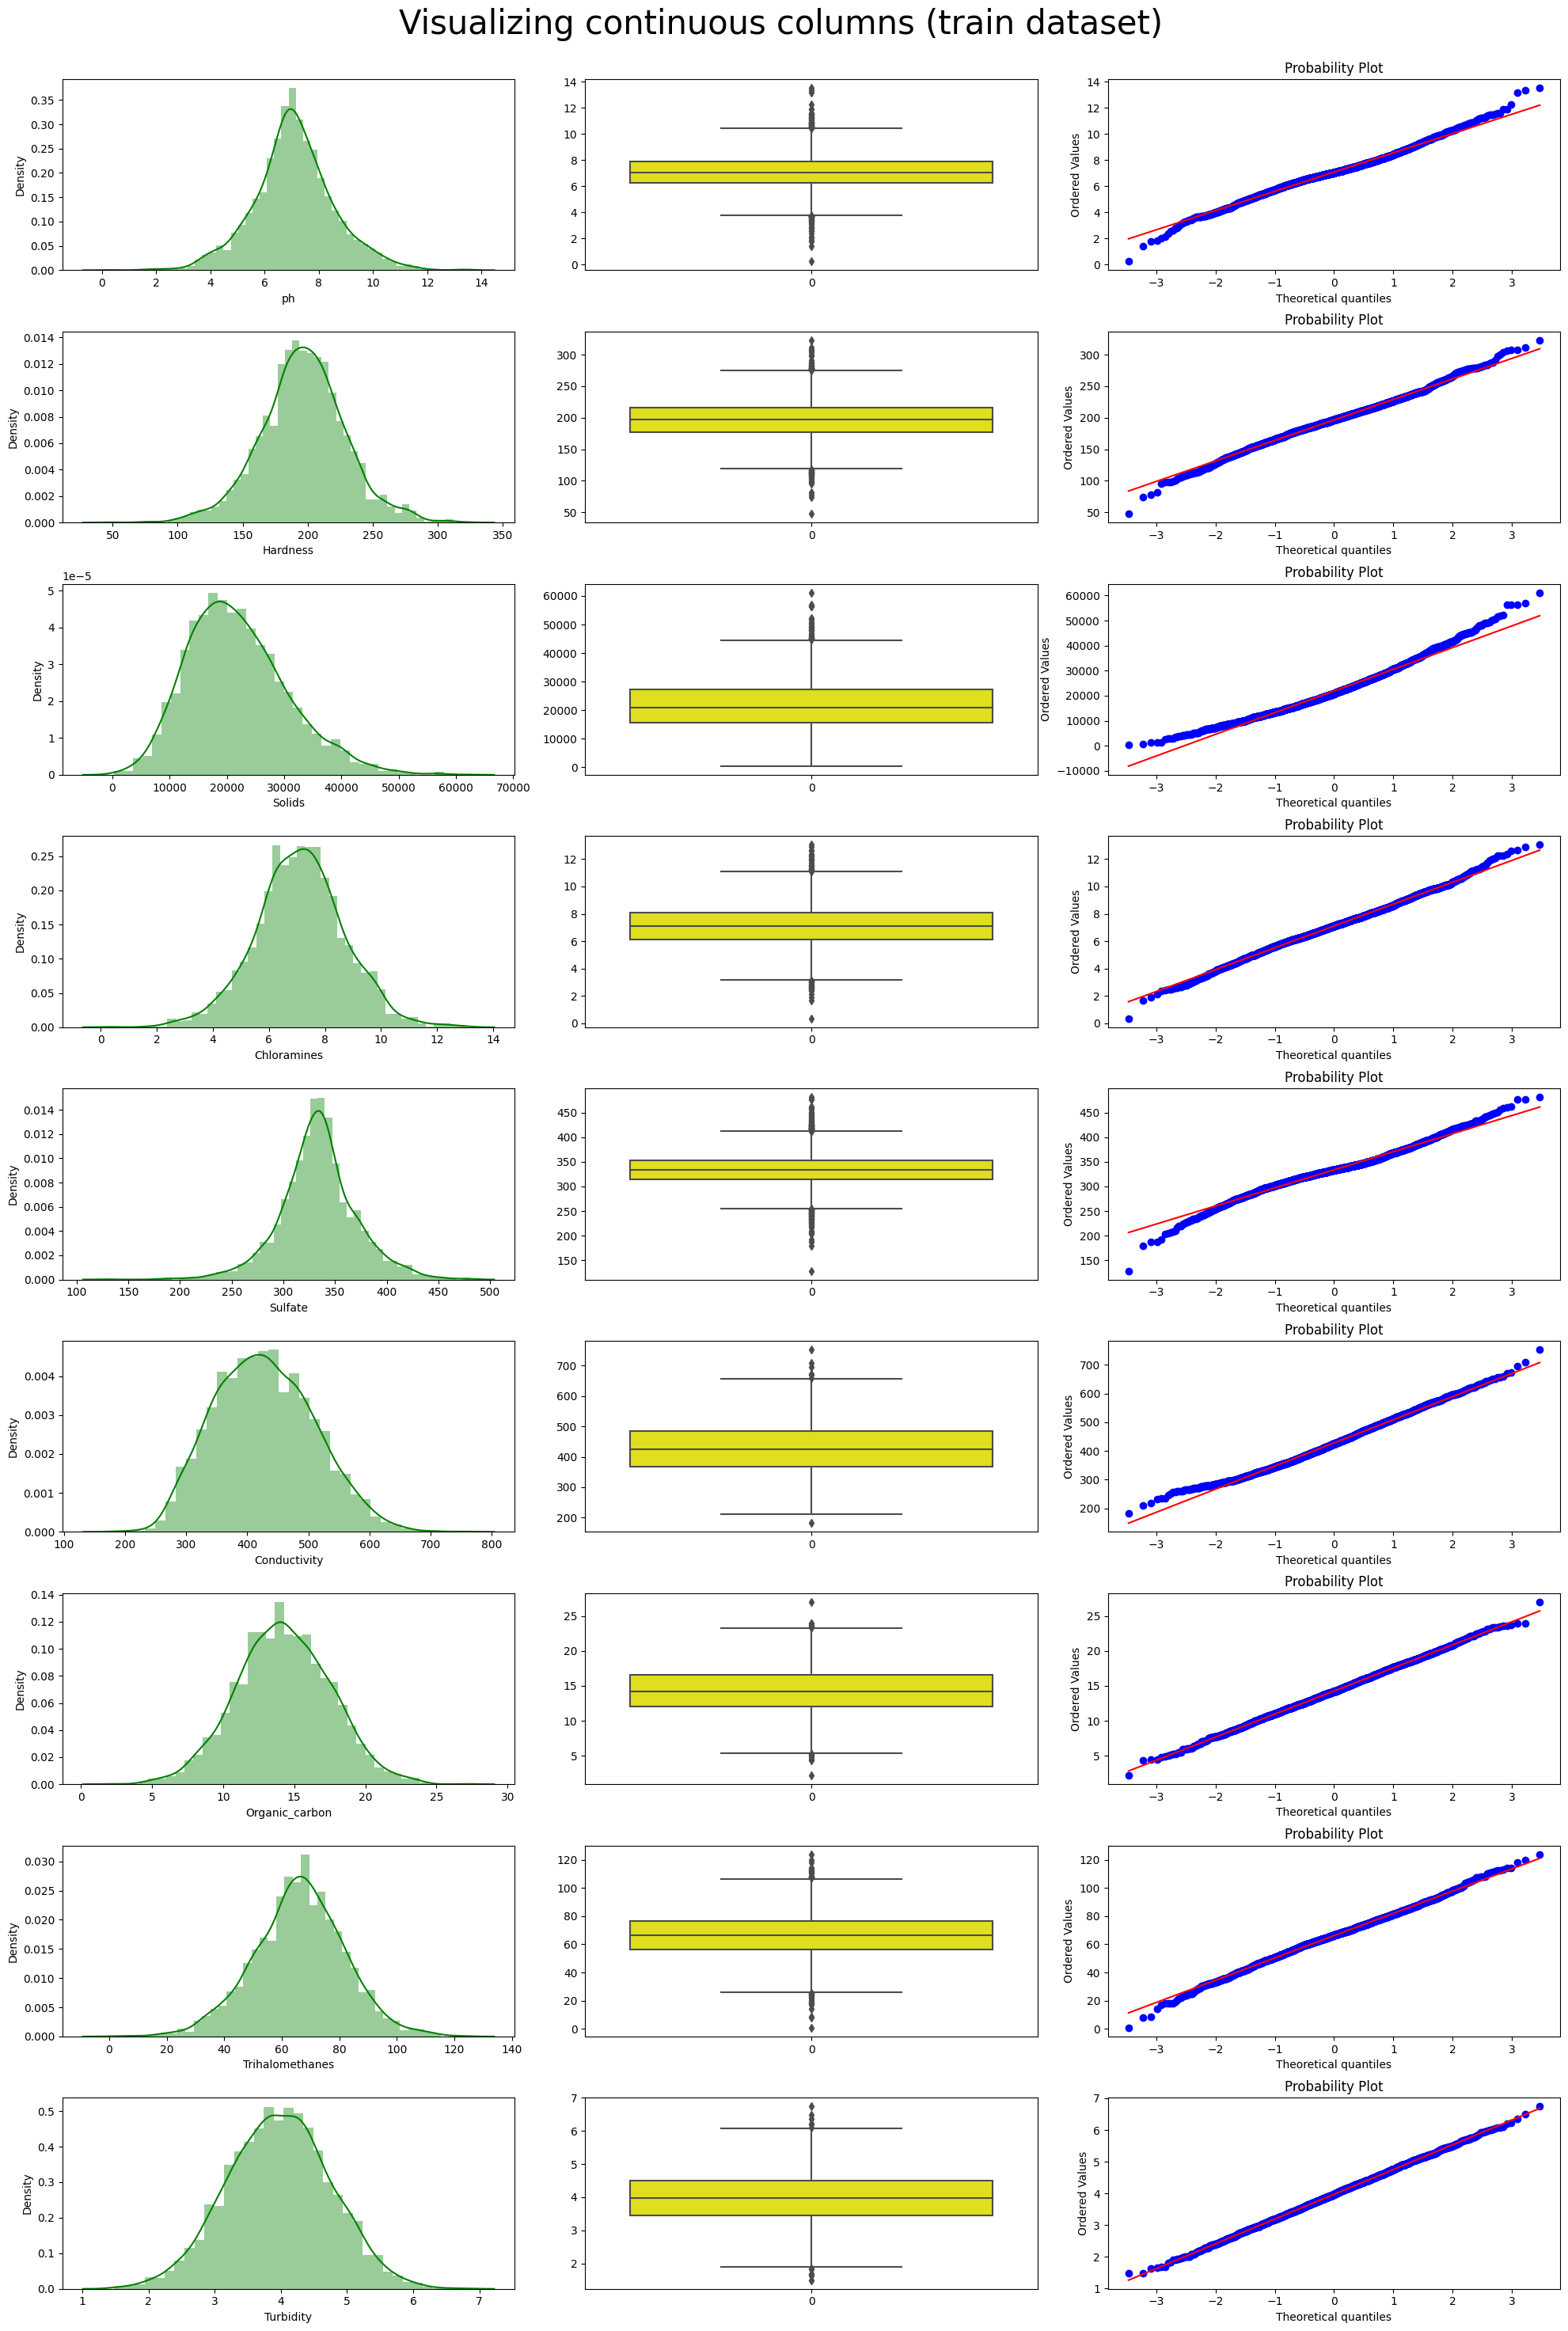

In [30]:
import warnings
numeric_features=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),3,figsize=(20,30))
for index,i in enumerate(numeric_features):
    sns.distplot(x_train[i],ax=ax[index,0],color='green')
    sns.boxplot(x_train[i],ax=ax[index,1],color='yellow')
    stats.probplot(x_train[i],plot=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

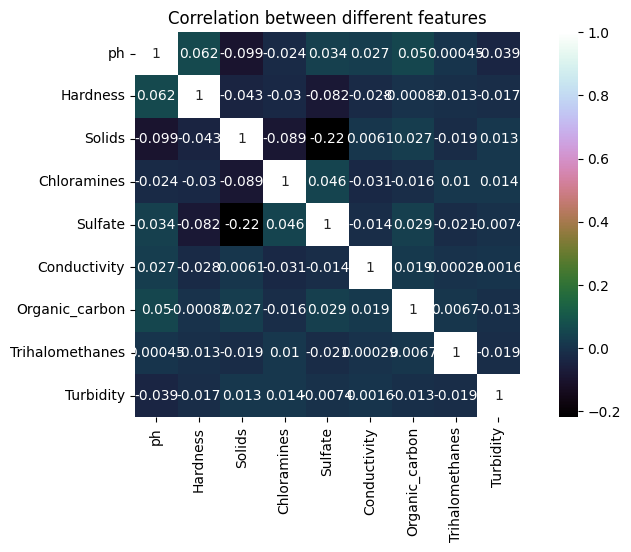

In [34]:
#Hitung Korelasi anatara data Fitur
correlation = x_train.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')
plt.show()

In [36]:
# Pengujian Statistik
# Untuk Data Numerik menggunakan Shapiro Walk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
    stat, p = shapiro(x_train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(f'Data Feature {feature} memiliki distribusi normal (H0 diterima)')
    else:
        print(f'Data Feature {feature} tidak memiliki distribusi normal (H0 ditolak)')

Statistics=0.990, p=0.000
Data Feature ph tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.995, p=0.000
Data Feature Hardness tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.978, p=0.000
Data Feature Solids tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.997, p=0.000
Data Feature Chloramines tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.983, p=0.000
Data Feature Sulfate tidak memiliki distribusi normal (H0 ditolak)
Statistics=0.994, p=0.000
Data Feature Conductivity tidak memiliki distribusi normal (H0 ditolak)
Statistics=1.000, p=0.933
Data Feature Organic_carbon memiliki distribusi normal (H0 diterima)
Statistics=0.997, p=0.000
Data Feature Trihalomethanes tidak memiliki distribusi normal (H0 ditolak)
Statistics=1.000, p=0.957
Data Feature Turbidity memiliki distribusi normal (H0 diterima)


In [38]:
# Pengujian Statistik
# Untuk data proporsi menggunakan Chi Square
from scipy.stats import chi2_contingency
# normality test
for feature in numeric_features:
    stat, p, dof, expected = chi2_contingency( x_train[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print(f'Data Feature {feature} memiliki proporsi sama (H0 diterima)')
    else:
        print(f'Data Feature {feature} memiliki proporsi berbeda (H0 ditolak)')


Statistics=0.000, p=1.000
Data Feature ph memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Hardness memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Solids memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Chloramines memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Sulfate memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Conductivity memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Organic_carbon memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Trihalomethanes memiliki proporsi sama (H0 diterima)
Statistics=0.000, p=1.000
Data Feature Turbidity memiliki proporsi sama (H0 diterima)
